<a href="https://colab.research.google.com/github/Samratnitesh/Cats-vs-Dogs-Classification/blob/main/Cats_vs_Dogs_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [7]:
!kaggle datasets download -d salader/dogs-vs-cats

 98% 1.05G/1.06G [00:08<00:00, 280MB/s]
100% 1.06G/1.06G [00:08<00:00, 139MB/s]


In [8]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [18]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, BatchNormalization, Dropout

In [10]:
#generator : Divides the data into the batches at a time
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size =(256, 256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size =(256, 256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [11]:
# Normalize
def process(image, label):
  image = tf.cast(image/255. ,tf.float32)
  return image, label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [19]:
# CNN Model
model = Sequential()

model.add(Conv2D(32, kernel_size=(3,3), padding= 'valid', activation='relu', input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Conv2D(64, kernel_size=(3,3), padding= 'valid', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Conv2D(128, kernel_size=(3,3), padding= 'valid', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1, activation='sigmoid'))

In [20]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 127, 127, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                      

In [21]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [22]:
history = model.fit(train_ds, epochs=10, validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 74s 110ms/step - loss: 1.3066 - accuracy: 0.5938 - val_loss: 0.6208 - val_accuracy: 0.6480
Epoch 2/10
625/625 [==============================] - 65s 103ms/step - loss: 0.5973 - accuracy: 0.6832 - val_loss: 0.6010 - val_accuracy: 0.6796
Epoch 3/10
625/625 [==============================] - 66s 105ms/step - loss: 0.4944 - accuracy: 0.7563 - val_loss: 0.4575 - val_accuracy: 0.7836
Epoch 4/10
625/625 [==============================] - 66s 105ms/step - loss: 0.4597 - accuracy: 0.7928 - val_loss: 0.4574 - val_accuracy: 0.7882
Epoch 5/10
625/625 [==============================] - 66s 105ms/step - loss: 0.3897 - accuracy: 0.8233 - val_loss: 0.5044 - val_accuracy: 0.7558
Epoch 6/10
625/625 [==============================] - 78s 124ms/step - loss: 0.3317 - accuracy: 0.8550 - val_loss: 0.4713 - val_accuracy: 0.7736
Epoch 7/10
625/625 [==============================] - 67s 107ms/step - loss: 0.2547 - accuracy: 0.8925 - val_loss: 0.5687 - val_ac

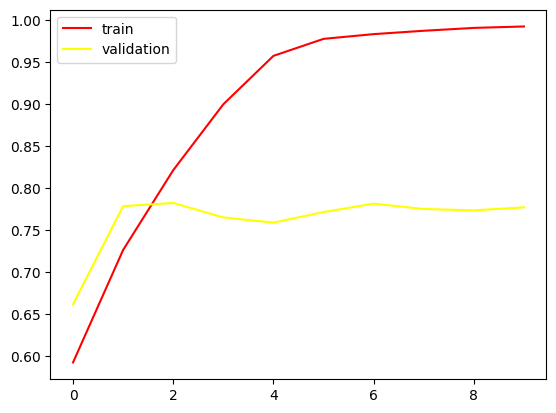

In [16]:
# Checking for training and validation accuracy
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], color='red', label='train')
plt.plot(history.history['val_accuracy'], color='yellow', label='validation')
plt.legend()
plt.show()

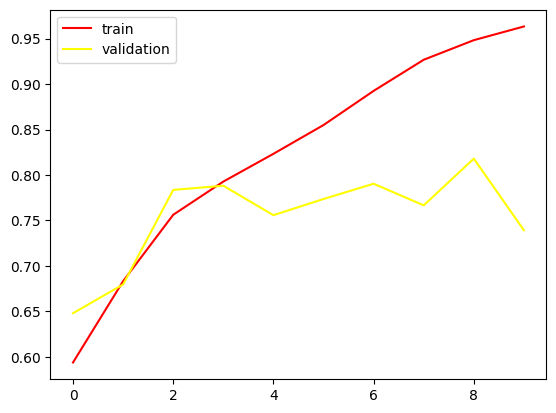

In [23]:
# After applying the batchNormalization
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], color='red', label='train')
plt.plot(history.history['val_accuracy'], color='yellow', label='validation')
plt.legend()
plt.show()

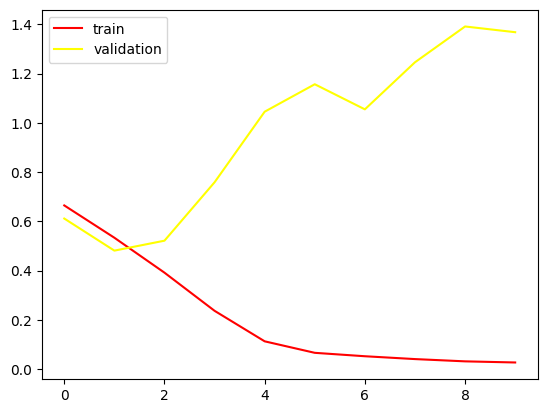

In [17]:

plt.plot(history.history['loss'], color='red', label='train')
plt.plot(history.history['val_loss'], color='yellow', label='validation')
plt.legend()
plt.show()

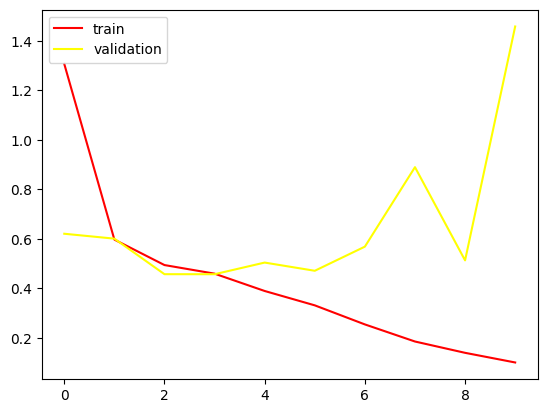

In [24]:
plt.plot(history.history['loss'], color='red', label='train')
plt.plot(history.history['val_loss'], color='yellow', label='validation')
plt.legend()
plt.show()

In [ ]:
# it is a clear indication of overfitting the model
